## Assignment 4

Your assignment is to write up a set of comparisons for constructing the same visualization. You must evaluate **matplotlib, vega-lite and bqplot**, and you can choose one of the following in addition: D3, Bokeh, Plotly, R/RStudio. 

These comparisons should be:

- What is the license for the software?
- What is the focus of the software?
- Does it have interactivity, and how easy is it?
- What are the pros and cons of using it?

These should total roughly half a page per engine.



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from bqplot import OrdinalScale, Bars, LinearScale, Axis, Figure, Tooltip, Scale

%matplotlib inline

In [2]:
df = pd.read_csv('./seattle-weather.csv')

In [3]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['month'] =  pd.DatetimeIndex(df['date']).month

In [6]:
df.sort_values(by='month', inplace=True)

In [7]:
df

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
759,2014-01-29,21.6,11.1,7.2,3.4,rain,1
757,2014-01-27,0.0,9.4,1.7,1.3,sun,1
756,2014-01-26,0.0,8.3,0.6,1.3,sun,1
755,2014-01-25,0.0,12.2,1.1,0.8,sun,1
...,...,...,...,...,...,...,...
1067,2014-12-03,0.0,10.0,0.0,3.6,sun,12
1068,2014-12-04,0.8,8.3,3.9,1.1,rain,12
1069,2014-12-05,3.0,12.8,6.7,3.1,rain,12
726,2013-12-27,0.3,8.9,0.0,2.1,rain,12


In [8]:
df = df.groupby(['month', 'weather']).size().to_frame('size').unstack(fill_value=0).stack()

In [9]:
df.reset_index(inplace=True)

In [10]:
df['month_name'] = ""
string_month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
                5: 'May', 6: 'June', 7:' July', 8: 'Aug',
                9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
for i in df.index:
    df.loc[i, 'month_name'] = string_month[df.loc[i, 'month']]

In [11]:
df

,month,weather,size,month_name
0,1,drizzle,10,Jan
1,1,fog,17,Jan
2,1,rain,61,Jan
3,1,snow,8,Jan
4,1,sun,28,Jan
5,2,drizzle,4,Feb
6,2,fog,3,Feb
7,2,rain,75,Feb
8,2,snow,4,Feb
9,2,sun,27,Feb


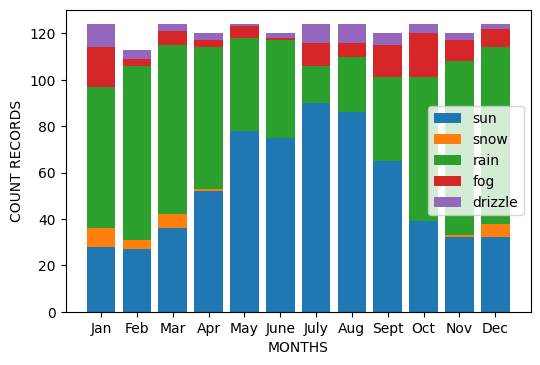

In [12]:
fig, ax = plt.subplots(dpi=100)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

ax.bar(labels, df[df['weather'] == 'sun']['size'], label='sun')
ax.bar(labels, df[df['weather'] == 'snow']['size'], label='snow', bottom = np.array(df[df['weather'] == 'sun']['size']))
ax.bar(labels, df[df['weather'] == 'rain']['size'], label='rain', bottom = np.array(df[df['weather'] == 'sun']['size']) + np.array(df[df['weather'] == 'snow']['size']))
ax.bar(labels, df[df['weather'] == 'fog']['size'], label='fog', bottom = np.array(df[df['weather'] == 'sun']['size']) + np.array(df[df['weather'] == 'snow']['size']) + np.array(df[df['weather'] == 'rain']['size']))
ax.bar(labels, df[df['weather'] == 'drizzle']['size'], label='drizzle', bottom = np.array(df[df['weather'] == 'fog']['size']) + np.array(df[df['weather'] == 'sun']['size']) + np.array(df[df['weather'] == 'snow']['size']) + np.array(df[df['weather'] == 'rain']['size']))

ax.set_xlabel("MONTHS")
ax.set_ylabel("COUNT RECORDS")
ax.legend();

## Q1: What is the license for the software?

The software used here is matplotlib. According to the [matplotlib website](https://matplotlib.org/stable/users/license.html) it falls under the Python Software Foundation (PSF) license. For the person or organization using matplotlib, there is an agreement between the Matplotlib Development Team (MDT) and the individual using this software. It is an open-source library so we are free to analyse, test and contribute to it's development. 

## Q2: What is the focus of the software?

Matplotlib is a software package built on numpy arrays and is easily usable with pandas dataframes in python, as each column is basically a pandas series and can be converted easily to numpy arrays. When converted, they can be easily integrated with matplotlib to generate 2D visualizations. The focus of this software is to use numpy arrays to build visualizations. Since numpy arrays are quite popular in Python, any array needing visualization can be done using matplotlib.

## Q3: Does it have interactivity, and how easy is it?
The graph generated here does not have interactivity, but matplotlib in general does offer interactivity through it's many functions. All plots are interactive - in the sense the GUI can be used to zoom and pan the graph. But in-depth interactivity such as hovering over to get values is a bit more complicated to integrate and is not available by default. [`matplotlib.plt.ion`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ion.html#matplotlib.pyplot.ion) can be used to toggle interactivity on and off.

## Q4: What are the pros and cons of using it?
Pros:
- can be used with a wide variety of packages that integrates numpy arrays into it. Since most packages use numpy arrays, visualizations using matplotlib can be easily done.
- pretty straightforward to create basic 2D visualizations

Cons:
- integrating interactivity beyong the default availble ones is difficult.
- does not offer a wide variety of plots that may be complex and it is difficult to adjust the properties of it.
- making 3D plots for a wider variety of applications - such as deep learning - is difficult and tedious.

In [13]:
np.array(df[df['weather'] == 'fog']['size'])

array([17,  3,  6,  3,  5,  1, 10,  6, 14, 19,  9,  8])

## bqplot

In [34]:
x_ord = OrdinalScale()
y_linear = LinearScale()

y_vals = [df[df['weather'] == 'sun']['size'], df[df['weather'] == 'snow']['size'],
          df[df['weather'] == 'rain']['size'], df[df['weather'] == 'fog']['size'],
         df[df['weather'] == 'drizzle']['size']]

bar4 = Bars(x=[1,2,3,4,5,6,7,8,9,10,11,12], y=y_vals,
           scales={'x':x_ord, 'y': y_linear}, type="stacked",
           labels=['sun', 'snow', 'rain', 'fog', 'drizzle'], display_legend=True,
           colors=["dodgerblue", "lime", "tomato", "orange", "fuchsia"], opacities=[0.8],
           stroke_width=1.5, stroke="black", padding=0.4,
           restrict_y=(0, 4)
           )

ax_x = Axis(scale=x_ord, label="Month",
            label_offset="35px",
            tick_format="0.1f")
ax_y = Axis(scale=y_linear, label="CountRecords",
            orientation="vertical", label_offset="35px",
            tick_format="0.1f")

fig = Figure(marks=[bar4],
             axes=[ax_x, ax_y],
             legend_location = "top",
             title="Count Records Stacked Bar Chart",
             fig_margin= dict(top=60, bottom=40, left=50, right=20),
             legend_style={"fill":"black"},
             legend_text={"font-size":"18px"}
      )

fig.layout.width="900px"
fig.layout.height="700px"

bar4.tooltip = Tooltip(fields=['x', 'y'], labels=["Month", "CountRecords"], formats=["0.1f", "0.2f"])

display(fig)

Figure(axes=[Axis(label='Month', label_offset='35px', scale=OrdinalScale(), tick_format='0.1f'), Axis(label='C…

In [28]:
labels

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'June',
 'July',
 'Aug',
 'Sept',
 'Oct',
 'Nov',
 'Dec']